# Example for iharp-Polaris package (04/23)

## 1. Install the package

In [2]:
!! pip install iharp-query-executor

['Collecting iharp-query-executor',
 '  Downloading iharp_query_executor-0.0.12-py3-none-any.whl.metadata (1.9 kB)',
 'Requirement already satisfied: jupyter in ./venv/lib/python3.13/site-packages (from iharp-query-executor) (1.1.1)',
 'Collecting xarray (from iharp-query-executor)',
 '  Using cached xarray-2025.3.1-py3-none-any.whl.metadata (12 kB)',
 'Collecting netcdf4 (from iharp-query-executor)',
 '  Using cached netCDF4-1.7.2-cp313-cp313-macosx_12_0_x86_64.whl.metadata (1.8 kB)',
 'Collecting h5py (from iharp-query-executor)',
 '  Using cached h5py-3.13.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (2.5 kB)',
 'Collecting dask[complete] (from iharp-query-executor)',
 '  Using cached dask-2025.4.0-py3-none-any.whl.metadata (3.8 kB)',
 'Collecting pandas (from iharp-query-executor)',
 '  Using cached pandas-2.2.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (89 kB)',
 'Collecting numpy (from iharp-query-executor)',
 '  Downloading numpy-2.2.5-cp313-cp313-macosx_14_0_x86_64.whl.met

## 2. Get an Xarray dataset of an ERA5 variable

In [3]:
from iharp_query_executor.get_raster_api import GetRasterExecutor

In [6]:
# variable name
variable = "2m_temperature"
# temporal range, resolution
start_datetime = "2020-01-01 00:00:00"
end_datetime = "2023-12-31 23:00:00"
temporal_resolution = "year"
# spatial range, resolution
min_lat = 59
max_lat = 84
min_lon = -74.0
max_lon = -10.0
spatial_resolution = 0.25
# aggregation method
aggregation = "max"

exec = GetRasterExecutor(
    variable=variable,
    start_datetime=start_datetime,
    end_datetime=end_datetime,
    temporal_resolution=temporal_resolution,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon,
    spatial_resolution=spatial_resolution,
    aggregation=aggregation,
)

raster = exec.execute()

raster

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 418kB
Dimensions:     (valid_time: 4, latitude: 101, longitude: 257)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 808B 84.0 83.75 83.5 ... 59.5 59.25 59.0
  * longitude   (longitude) float64 2kB -74.0 -73.75 -73.5 ... -10.25 -10.0
  * valid_time  (valid_time) datetime64[ns] 32B 2020-12-31 ... 2023-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 415kB 277.5 ... 289.9
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-06T19:22 GRIB to CDM+CF via cfgrib-0.9.1...

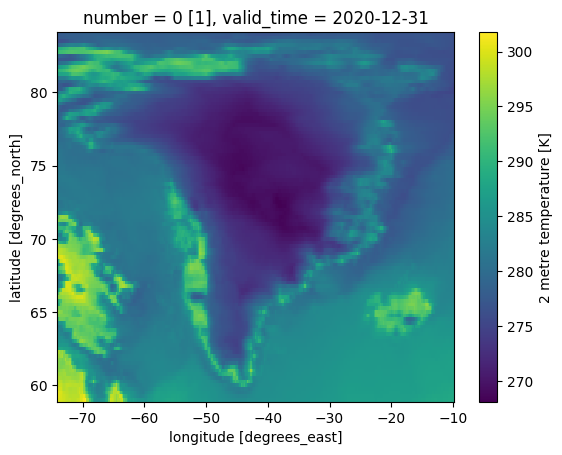

In [ ]:
# visualize the raster
raster['t2m'].isel(valid_time=0).plot()

## 3. Specify the spatial range with a GepJSON shape

In [11]:
from iharp_query_executor.get_geojson_executor import GeoJsonExecutor

In [12]:
geojson_file = "data/tri.geojson"

exec = GeoJsonExecutor(
  variable=variable,
  start_datetime=start_datetime,
  end_datetime=end_datetime,
  temporal_resolution=temporal_resolution,
  min_lat=min_lat,
  max_lat=max_lat,
  min_lon=min_lon,
  max_lon=max_lon,
  spatial_resolution=spatial_resolution,
  aggregation=aggregation,
  geojson_file=geojson_file
)

geojson_masked_raster = exec.execute()
geojson_masked_raster

Mask Succeeded: Reduced from 8484 to 3724 points


/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 35kB
Dimensions:     (valid_time: 4, latitude: 21, longitude: 101)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 168B 80.0 79.75 79.5 ... 75.5 75.25 75.0
  * longitude   (longitude) float64 808B -50.0 -49.75 -49.5 ... -25.25 -25.0
  * valid_time  (valid_time) datetime64[ns] 32B 2020-12-31 ... 2023-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 34kB nan nan ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-06T19:22 GRIB to CDM+CF via cfgrib-0.9.1...

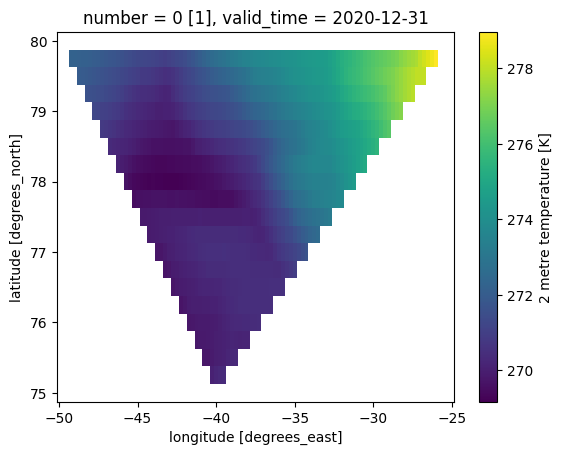

In [13]:
# visualize the raster
geojson_masked_raster['t2m'].isel(valid_time=0).plot()

Mask Succeeded: Reduced from 2340 to 1236 points


/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


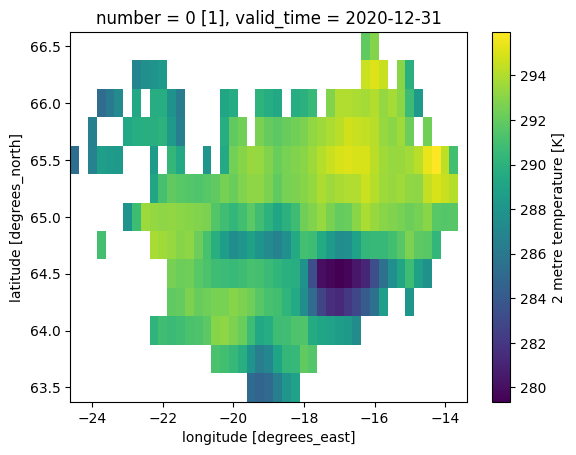

In [14]:
iceland = GeoJsonExecutor(
  variable=variable,
  start_datetime=start_datetime,
  end_datetime=end_datetime,
  temporal_resolution=temporal_resolution,
  min_lat=min_lat,
  max_lat=max_lat,
  min_lon=min_lon,
  max_lon=max_lon,
  spatial_resolution=spatial_resolution,
  aggregation=aggregation,
  geojson_file="data/iceland.geojson"
).execute()

iceland['t2m'].isel(valid_time=0).plot()

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Mask Succeeded: Reduced from 92720 to 40848 points


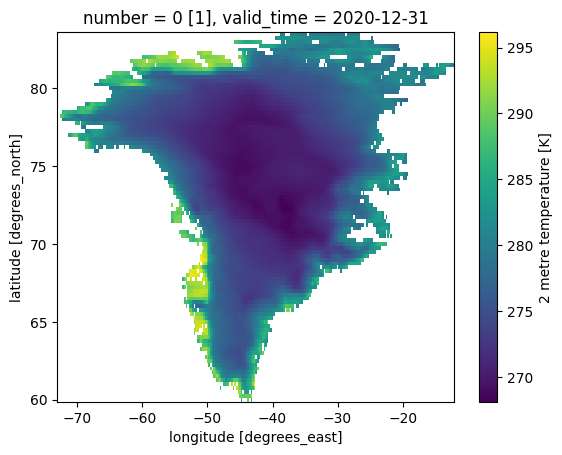

In [ ]:
greenland = GeoJsonExecutor(
    variable=variable,
    start_datetime=start_datetime,
    end_datetime=end_datetime,
    temporal_resolution=temporal_resolution,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon,
    spatial_resolution=spatial_resolution,
    aggregation=aggregation,
    geojson_file="data/greenland.geojson",
).execute()
greenland["t2m"].isel(valid_time=0).plot()